In [1]:
%env ROS_IP=127.0.0.1
%env ROS_MASTER_URI=http://127.0.0.1:11311

!export ROS_MASTER_URI=http://127.0.0.1:11311
!export ROS_IP=127.0.0.1

!echo $ROS_IP
!echo $ROS_MASTER_URI


env: ROS_IP=127.0.0.1
env: ROS_MASTER_URI=http://127.0.0.1:11311
127.0.0.1
http://127.0.0.1:11311


In [2]:
from visioncraft.locobot.camera import LocobotCamera
from visioncraft.locobot.arm_control import LocobotArmControl
from geometry_msgs.msg import Pose
from tf.transformations import quaternion_from_euler
import numpy as np
import matplotlib.pyplot as plt


In [3]:
cam = LocobotCamera(use_simulation=True)


In [4]:
arm_control = LocobotArmControl(use_simulation=True)


[INFO] [1745978919.032487, 692.441000]: Waiting for joint trajectory action on /locobot/arm_controller/follow_joint_trajectory…
[INFO] [1745978919.073435, 692.471000]: Joint‐space action server ready
[INFO] [1745978919.135083308]: Loading robot model 'locobot'...
[INFO] [1745978919.135121409]: No root/virtual joint specified in SRDF. Assuming fixed joint
[INFO] [1745978920.340604673, 693.650000000]: Ready to take commands for planning group interbotix_arm.
[INFO] [1745978920.358410, 693.653000]: LocobotArmControl initialized


[WARN] [1745978919.133175955]: Link 'locobot/caster_back_link' is not known to URDF. Cannot disable/enable collisons.
[WARN] [1745978919.134546520]: Link 'locobot/caster_front_link' is not known to URDF. Cannot disable/enable collisons.
[WARN] [1745978919.134590498]: Link 'locobot/wheel_left_link' is not known to URDF. Cannot disable/enable collisons.
[WARN] [1745978919.134601734]: Link 'locobot/wheel_right_link' is not known to URDF. Cannot disable/enable collisons.
[WARN] [1745978919.134618450]: Link 'locobot/caster_back_link' is not known to URDF. Cannot disable/enable collisons.
[WARN] [1745978919.134627017]: Link 'locobot/caster_front_link' is not known to URDF. Cannot disable/enable collisons.
[WARN] [1745978919.134641591]: Link 'locobot/wheel_left_link' is not known to URDF. Cannot disable/enable collisons.
[WARN] [1745978919.134649847]: Link 'locobot/wheel_right_link' is not known to URDF. Cannot disable/enable collisons.
[WARN] [1745978919.134662407]: Link 'locobot/caster_back

In [5]:
arm_control.open_gripper()

In [6]:
arm_control.close_gripper()

In [7]:
arm_control.move_arm_joints(LocobotArmControl.JOINT_SLEEP)

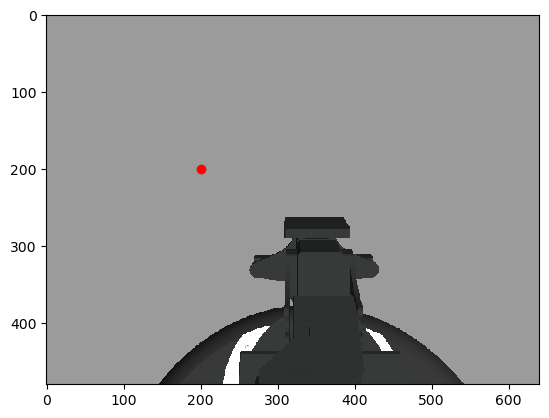

In [8]:
# Example: Grab cube at center of image
cam.pan(0.0)
cam.tilt(1.1)
height, width = cam.image.shape[:2]
center_x = 200
center_y = 200

plt.imshow(cam.image)
# add point on top of the image
plt.scatter(center_x, center_y, color='red')

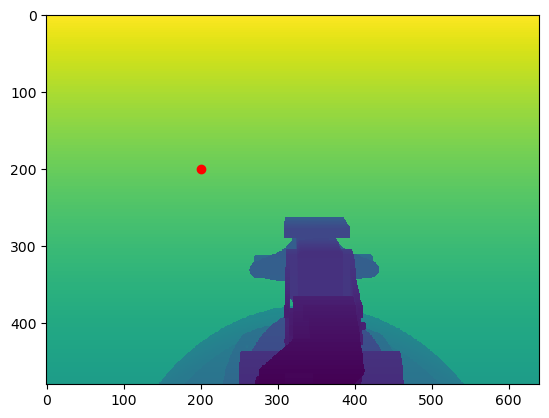

In [9]:
plt.imshow(cam.depth_image)
# add point on top of the image
plt.scatter(center_x, center_y, color='red')

In [10]:
point_cam = cam.get_point_at_pixel(center_x, center_y)
print(point_cam)


point_base = cam.get_target_coordinate_from_camera(point_cam)
print(point_base)

[-0.12166341 -0.0402151   0.60003698]
[0.3699123182830812, 0.13914695249995207, 0.017828425155516636]


In [11]:
print(f"Point in base frame: {point_base}")

arm_control.pick(point_base, size=0.03)

Point in base frame: [0.3699123182830812, 0.13914695249995207, 0.017828425155516636]


In [12]:
point_base_2 = point_base + np.array([0.1, 0.1, 0.03])
arm_control.place(point_base_2, size=0.03)
arm_control.open_gripper()